<a href="https://colab.research.google.com/github/dsanroman96/Machine-Learning-Projects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import time

In [ ]:
class LinearRegression:
  def __init__(self, learning_rate, n_iters):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def predict(self, x):
    return np.dot(x, self.weights) + self.bias
  
  def mean_squared_error(self, y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

  def r2_score(self, y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

  def fit(self, x, y):
    n_samples, n_features = x.shape

    self.weights = np.zeros(n_features)
    self.bias = 0

    for i in range(self.n_iters):
      y_predicted = self.predict(x)
      dw = (1 / n_samples) * np.dot(x.T, (y_predicted - y))
      db = (1 / n_samples) * np.sum(y_predicted - y)

      self.weights -= self.lr * dw
      self.bias -= self.lr * db

In [ ]:
X, y = datasets.make_regression(
    n_samples=500, n_features=1, noise=30, random_state=10
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

In [ ]:
regressor = LinearRegression(learning_rate=0.001, n_iters=5000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print("MSE:", regressor.mean_squared_error(y_test, predictions))
print("Accuracy:", regressor.r2_score(y_test, predictions))

MSE: 861.0159624594369
Accuracy: 0.7641080215960661


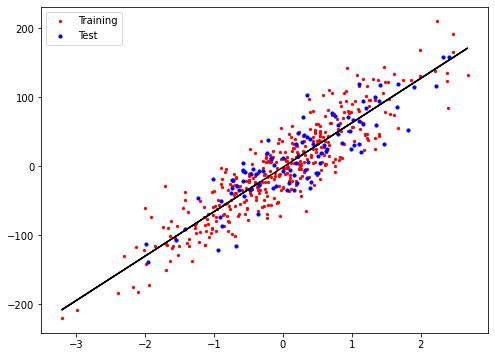

In [ ]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color="red", s=5, label="Training")
m2 = plt.scatter(X_test, y_test, color="blue", s=10, label="Test")
plt.plot(X, y_pred_line, color="black", linewidth=1.5)
plt.legend()
plt.show()